In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
from datetime import datetime
import pandas as pd
import numpy as np
globalstart = datetime.now()

In [2]:
path = "/kaggle/input/"
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
print(dir_list)

Files and directories in ' /kaggle/input/ ' :
['savedresult2', 'netflix-prize-data', 'saved-results-version-1']


In [3]:
# To measure time taken to execute the code
begin = datetime.now()
pathLoc = "/kaggle/input/saved-results-version-1/"
# print(pathLoc+'Data.csv')
# print(os.path.isfile(pathLoc+'Data.csv'))
if not os.path.isfile(pathLoc+'Data.csv'):
    print("File not present. Started creating CSV :")
    with open('Data.csv', 'w') as data:
#         'combined_data_1.txt', 'combined_data_2.txt',
      files=['combined_data_3.txt','combined_data_4.txt']
      for file in files:
          print("Reading data consisting of - userid, rating and date for particular movieid from {} ...".format(file))
          with open(pathLoc+file,'r') as f:
              for line in f:
                  row = list()
                  line = line.strip()  # remove whitespaces
                  if line.endswith(':'):
                      movieid = line[:-1]
                  else:
                      row = [item for item in line.split(',')]
                      row.insert(0, movieid)
                      data.write(','.join(row))
                      data.write('\n')
          print("This file is done reading.\n")
else:
  print("File already present")
print('Total time to combine the data', datetime.now()-begin)

File already present
Total time to combine the data 0:00:00.003806


In [4]:
begin = datetime.now()
pathLoc = '/kaggle/input/saved-results-version-1/'
print("Creating DataFrame from combined Data...")
df = pd.read_csv(pathLoc + 'Data.csv', sep=',', names=['movieid', 'userid', 'rating', 'date'], dtype={'movieid': int, 'userid': int, 'rating': int})
df.date = pd.to_datetime(df.date)
print('DataFrame created.\n')

print('Starting sorting the data according to time...')
df.sort_values(by='date', inplace=True)
print('DataFrame is sorted')
print('Total time to create and sort the dataframe : ', datetime.now()-begin)

Creating DataFrame from combined Data...
DataFrame created.

Starting sorting the data according to time...
DataFrame is sorted
Total time to create and sort the dataframe :  0:01:02.736943


In [5]:
print(df.head())
begin = datetime.now()
print(df.describe()['rating'])
print('Total time to exceute :', datetime.now()-begin)

          movieid  userid  rating       date
45181370    17064  510180       2 1999-11-11
19664881    12818  510180       2 1999-11-11
2845807      9798  510180       3 1999-11-11
49429494    17764  510180       5 1999-11-11
33271295    15057  510180       5 1999-11-11
count    4.944915e+07
mean     3.614743e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
std      1.084964e+00
Name: rating, dtype: float64
Total time to exceute : 0:00:06.525594


In [6]:
# checking for empty fields
print("No of Nan values in the Dataframe : ", (df.isnull().any()).sum())
begin = datetime.now()
print("No of duplicate entry : ", df.duplicated(['movieid','userid','rating']).sum())
print('Total time to find total duplicate :', datetime.now()-begin)

No of Nan values in the Dataframe :  0
No of duplicate entry :  0
Total time to find total duplicate : 0:00:11.177480


In [7]:
# spliting the data in training and test
pathLoc = "/kaggle/input/saved-results-version-1/"
begin = datetime.now()
if not os.path.isfile(pathLoc + 'trainingdata.csv'):
    sz = int(df.shape[0] * 0.70)
    df.iloc[:sz].to_csv(pathLoc + "trainingdata.csv", index=False)
    print("Created trainingdata.csv")

train_df = pd.read_csv(pathLoc + "trainingdata.csv", parse_dates=['date'])
print('Total time to execute :', datetime.now()-begin)

Total time to execute : 0:00:28.328374


In [8]:
pathLoc = "/kaggle/input/saved-results-version-1/"
begin = datetime.now()
if not os.path.isfile(pathLoc + 'testdata.csv'):
    sz = int(df.shape[0] * 0.70)
    df.iloc[sz:].to_csv(pathLoc + "testdata.csv", index=False)
    print("Created testdata.csv")
test_df = pd.read_csv(pathLoc + "testdata.csv")
print('Total time to execute :', datetime.now()-begin)

Total time to execute : 0:00:09.138095


In [9]:
print("Training data :")
print("....................................................................")
print("\nTotal Number of Users   :", train_df.userid.nunique())
print("Total Number of movies  :", train_df.movieid.nunique())
print("Total Number of ratings :",train_df.shape[0])

print("\n\nTest data :")
print("....................................................................")
print("\nTotal Number of Users   :", test_df.userid.nunique())
print("Total Number of movies  :", test_df.movieid.nunique())
print("Total Number of ratings :",test_df.shape[0])

Training data :
....................................................................

Total Number of Users   : 365060
Total Number of movies  : 8190
Total Number of ratings : 34614406


Test data :
....................................................................

Total Number of Users   : 373432
Total Number of movies  : 8558
Total Number of ratings : 14834746


In [10]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedFormatter, AutoLocator
import seaborn as sns
sns.set_style('whitegrid')

In [11]:
# -----------------------------------
def readibility(num, units='m'):
    units = units.lower()
    num = float(num)
    conversions = {'k': 10**3, 'm': 10**6, 'b': 10**9}
    return str(num / conversions.get(units, 1)) + " " + units.upper()

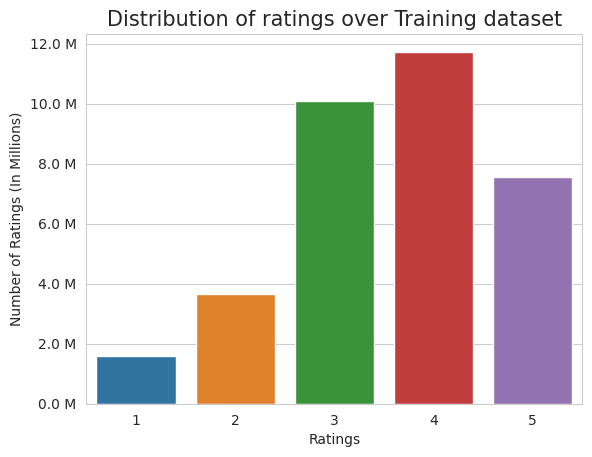

In [12]:
fig, ax = plt.subplots()
plt.title('Distribution of ratings over Training dataset', fontsize=15)
sns.countplot(pd.DataFrame(train_df.rating.values, columns=['Ratings']), x='Ratings')
ax.yaxis.set_major_formatter(FixedFormatter([readibility(item, 'M') for item in ax.get_yticks()]))
ax.yaxis.set_major_locator(AutoLocator())
ax.set_ylabel('Number of Ratings (In Millions)')
plt.show()

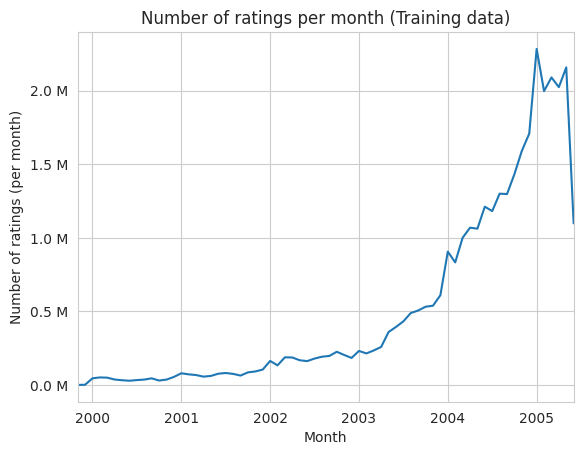

In [13]:
ax = train_df.resample('ME', on='date').rating.count().plot()
ax.set_title('Number of ratings per month (Training data)')
plt.xlabel('Month')
plt.ylabel('Number of ratings (per month)')
ax.set_yticklabels([readibility(item, 'm') for item in ax.get_yticks()])
plt.show()

In [14]:
no_of_rated_movies_per_user = train_df.groupby(by='userid').rating.count().sort_values(ascending=False)
print(no_of_rated_movies_per_user.head())

userid
305344     8006
2439493    7404
387418     7054
1639792    4666
1461435    4439
Name: rating, dtype: int64


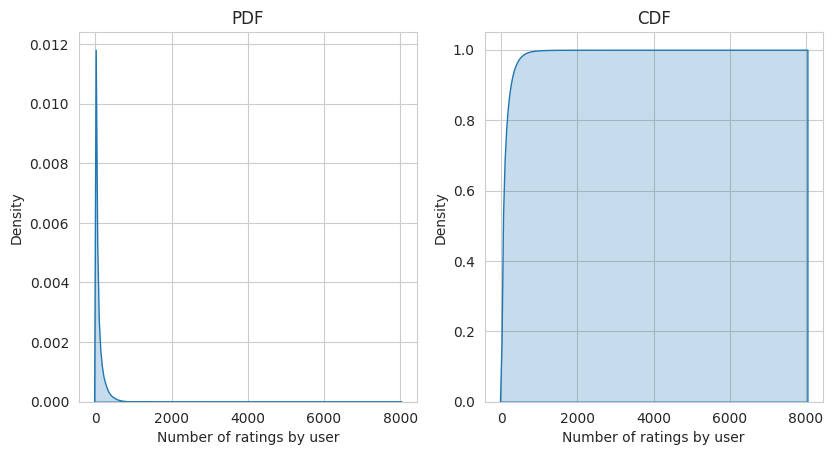

In [15]:
fig = plt.figure(figsize=plt.figaspect(.5))
ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, fill=True, ax=ax1)
plt.xlabel('Number of ratings by user')
plt.title("PDF")
ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, fill=True, cumulative=True,ax=ax2)
plt.xlabel('Number of ratings by user')
plt.title('CDF')
plt.show()

In [16]:
no_of_rated_movies_per_user.describe()

count    365060.000000
mean         94.818402
std         138.909165
min           1.000000
25%          15.000000
50%          43.000000
75%         118.000000
max        8006.000000
Name: rating, dtype: float64

In [17]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

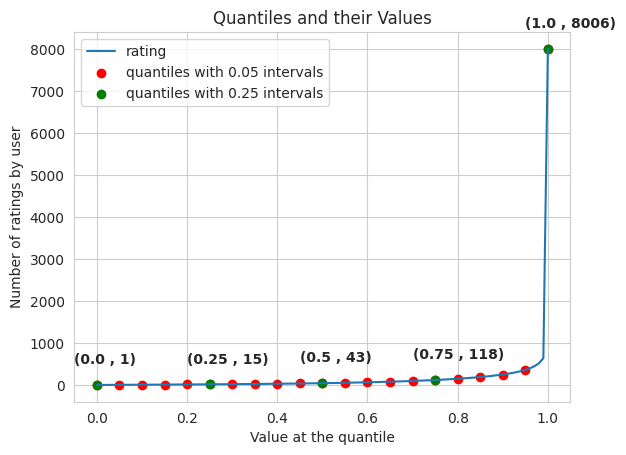

In [18]:
plt.title("Quantiles and their Values")
quantiles.plot()
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='red', label="quantiles with 0.05 intervals")
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='green', label = "quantiles with 0.25 intervals")
plt.ylabel('Number of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

# annotate the 25th, 50th, 75th and 100th percentile values....
for x,y in zip(quantiles.index[::25], quantiles[::25]):
    plt.annotate(text="({} , {})".format(x, y), xy=(x, y), xytext=(x - 0.05, y + 500), fontweight='bold')

plt.show()

In [19]:
print(quantiles[::5])
print('\nNumber of ratings of last 5 percentile (greater than 359) : {}\n'.format(sum(no_of_rated_movies_per_user>= 359)) )

0.00       1
0.05       3
0.10       6
0.15       9
0.20      12
0.25      15
0.30      19
0.35      23
0.40      29
0.45      35
0.50      43
0.55      52
0.60      64
0.65      78
0.70      96
0.75     118
0.80     148
0.85     188
0.90     249
0.95     359
1.00    8006
Name: rating, dtype: int64

Number of ratings of last 5 percentile (greater than 359) : 18353



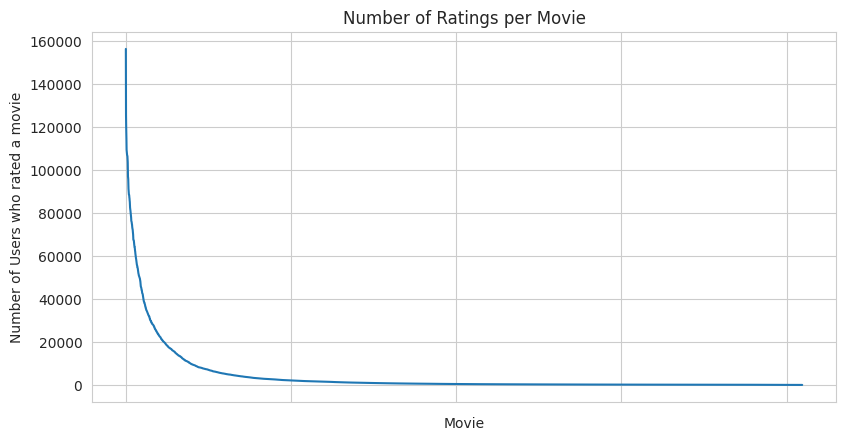

In [20]:
no_of_ratings_per_movie = train_df.groupby(by='movieid').rating.count().sort_values(ascending=False)
fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('Number of Ratings per Movie')
plt.xlabel('Movie')
plt.ylabel('Number of Users who rated a movie')
ax.set_xticklabels([])
plt.show()

In [21]:
from scipy import sparse
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import random

In [22]:
start = datetime.now()
if os.path.isfile('/kaggle/input/saved-results-version-1/train_sparse_matrix.npz'):
    print("File Found. Loading Data...")
    train_sparse_matrix = sparse.load_npz('/kaggle/input/saved-results-version-1/train_sparse_matrix.npz')
    print("Done.")
else: 
    print("Creating sparse matrix from dataframe...")
    train_sparse_matrix = sparse.csr_matrix((train_df.rating.values, (train_df.userid.values, train_df.movieid.values)),)
    print('Completed. (userid * movieid ) ',train_sparse_matrix.shape)
    print('Creating File')
    sparse.save_npz("train_sparse_matrix.npz", train_sparse_matrix)
    print('Completed\n')

print(datetime.now() - start)

File Found. Loading Data...
Done.
0:00:02.196306


In [23]:
us,mv = train_sparse_matrix.shape
elem = train_sparse_matrix.count_nonzero()
print("Sparsity Of Trained Matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Trained Matrix : 99.92648218909842 % 


In [24]:
start = datetime.now()
if os.path.isfile('/kaggle/input/saved-results-version-1/test_sparse_matrix.npz'):
    print("File Found. Loading Data...")
    test_sparse_matrix = sparse.load_npz('/kaggle/input/saved-results-version-1/test_sparse_matrix.npz')
    print("DONE.")
else: 
    print("Creating sparse matrix from dataframe...")
    test_sparse_matrix = sparse.csr_matrix((test_df.rating.values, (test_df.userid.values,test_df.movieid.values)))
    
    print('Completed. (userid * movieid ) ',test_sparse_matrix.shape)
    print('Creating local file')
    sparse.save_npz("test_sparse_matrix.npz", test_sparse_matrix)
    print('Completed\n')
    
print(datetime.now() - start)

File Found. Loading Data...
DONE.
0:00:00.941615


In [25]:
us,mv = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Sparsity Of Test matrix : 99.9684923655428 % 


In [26]:
def get_average_ratings(sparse_matrix, of_users):
    ax = 1 if of_users else 0
    sum_of_ratings = sparse_matrix.sum(axis=ax).A1
    is_rated = sparse_matrix != 0
    no_of_ratings = is_rated.sum(axis=ax).A1
    u, m = sparse_matrix.shape
    average_ratings = {}
    for i in range(u if of_users else m):
        if no_of_ratings[i] != 0:
            average_ratings[i] = sum_of_ratings[i] / no_of_ratings[i]
    return average_ratings

In [27]:
# -----------------------------------------------------------------
train_averages = dict()
# get the global average of ratings in our train set.
train_global_average = train_sparse_matrix.sum()/train_sparse_matrix.count_nonzero()
train_averages['global'] = train_global_average
train_averages

{'global': 3.576666749676421}

In [28]:
train_averages['user'] = get_average_ratings(train_sparse_matrix, of_users=True)
print('\nAverage rating of user 10 :',train_averages['user'][10])


Average rating of user 10 : 3.475


In [29]:
train_averages['movie'] =  get_average_ratings(train_sparse_matrix, of_users=False)
print('\nAverage rating of movie 10341:', train_averages['movie'].get(10341, "Movie not found"))



Average rating of movie 10341: 3.6291739894551847


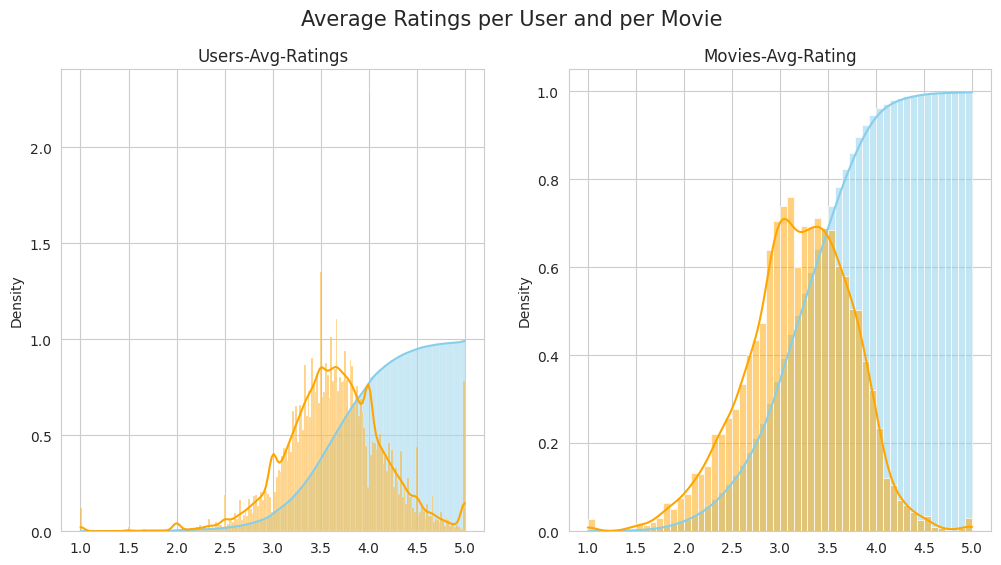

0:00:06.797246


In [30]:
start = datetime.now()

# Draw PDFs for average rating per user and average
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Average Ratings per User and per Movie', fontsize=15)

# Plot average ratings per user
ax1 = axes[0]
ax1.set_title('Users-Avg-Ratings')
user_averages = [rat for rat in train_averages['user'].values()]
sns.histplot(user_averages, ax=ax1, stat='density', kde=True, cumulative=True, label='Cdf', color='skyblue')
sns.histplot(user_averages, ax=ax1, stat='density', kde=True, label='Pdf', color='orange')

# Plot average ratings per movie
ax2 = axes[1]
ax2.set_title('Movies-Avg-Rating')
movie_averages = [rat for rat in train_averages['movie'].values()]
sns.histplot(movie_averages, ax=ax2, stat='density', kde=True, cumulative=True, label='Cdf', color='skyblue')
sns.histplot(movie_averages, ax=ax2, stat='density', kde=True, label='Pdf', color='orange')

plt.show()
print(datetime.now() - start)

In [31]:
total_users = df.userid.nunique()
users_train = len(train_averages['user'])
new_users = total_users - users_train

print('Total number of Users  :', total_users)
print('Number of Users in Train data :', users_train)
print("Number of Users that didn't appear in train data: {}({} %) \n ".format(new_users, np.round((new_users/total_users)*100, 2)))


Total number of Users  : 478796
Number of Users in Train data : 365060
Number of Users that didn't appear in train data: 113736(23.75 %) 
 


In [32]:
total_movies = df.movieid.nunique()
movies_train = len(train_averages['movie'])
new_movies = total_movies - movies_train

print('\nTotal number of Movies  :', total_movies)
print('\nNumber of Movies in Train data :', movies_train)
print("\nNo of Movies that didn't appear in train data: {}({} %) \n ".format(new_movies,np.round((new_movies/total_movies)*100, 2)))


Total number of Movies  : 8560

Number of Movies in Train data : 8190

No of Movies that didn't appear in train data: 370(4.32 %) 
 


In [33]:
from sklearn.metrics.pairwise import cosine_similarity

def compute_user_similarity(sparse_matrix, compute_for_few=False, top=100, verbose=False, verb_for_n_rows=20, draw_time_taken=True):
    no_of_users, _ = sparse_matrix.shape
    row_ind, col_ind = sparse_matrix.nonzero()
    row_ind = sorted(set(row_ind))
    time_taken = list()

    rows, cols, data = list(), list(), list()
    if verbose:
        print("Computing top", top, "similarities for each user...")
    
    start = datetime.now()
    temp = 0
    
    for row in row_ind[:top] if compute_for_few else row_ind:
        temp = temp + 1
        prev = datetime.now()
        
        sim = cosine_similarity(sparse_matrix.getrow(row), sparse_matrix).ravel()
        top_sim_ind = sim.argsort()[-top:]
        top_sim_val = sim[top_sim_ind]
        
        rows.extend([row]*top)
        cols.extend(top_sim_ind)
        data.extend(top_sim_val)
        time_taken.append(datetime.now().timestamp() - prev.timestamp())
        
        if verbose and temp % verb_for_n_rows == 0:
            print("Computing done for {} users [  time elapsed : {}  ]".format(temp, datetime.now() - start))
            
    if verbose:
        print('Creating Sparse matrix from the computed similarities')
    
    if draw_time_taken:
        plt.plot(time_taken, label='time taken for each user')
        plt.plot(np.cumsum(time_taken), label='Total time')
        plt.legend(loc='best')
        plt.xlabel('User')
        plt.ylabel('Time (in seconds)')
        plt.show()
        
    return sparse.csr_matrix((data, (rows, cols)), shape=(no_of_users, no_of_users)), time_taken

Computing top 100 similarities for each user...
Computing done for 20 users [  time elapsed : 0:00:29.100702  ]
Computing done for 40 users [  time elapsed : 0:00:57.919001  ]
Computing done for 60 users [  time elapsed : 0:01:26.659219  ]
Computing done for 80 users [  time elapsed : 0:01:55.516478  ]
Computing done for 100 users [  time elapsed : 0:02:24.389639  ]
Creating Sparse matrix from the computed similarities


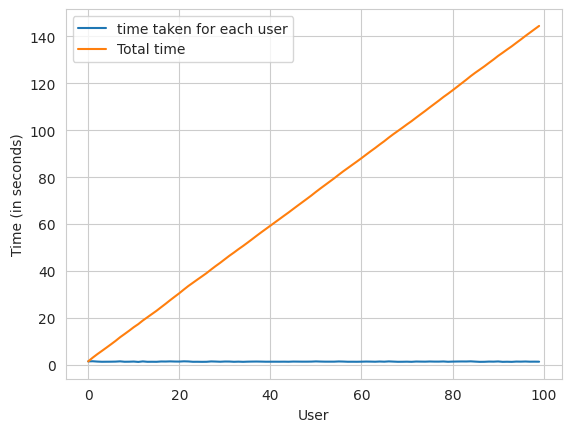

----------------------------------------------------------------------------------------------------
Time taken : 0:02:30.179980


In [34]:
start = datetime.now()
u_u_sim_sparse, _ = compute_user_similarity(train_sparse_matrix, compute_for_few=True, top = 100,
                                                     verbose=True)
print("-"*100)
print("Time taken :",datetime.now()-start)

In [35]:
start = datetime.now()
similarity_file_path = '/kaggle/input/saved-results-version-1/m_m_sim_sparse.npz'
if not os.path.isfile(similarity_file_path):
    print("It seems you don't have that file. Computing movie_movie similarity...")
    start_computation = datetime.now()
    m_m_sim_sparse = cosine_similarity(X=train_sparse_matrix.T, dense_output=False)
    print("Done..")
    computation_time = datetime.now() - start_computation
    print("Saving it to disk without the need of re-computing it again.. ")
    start_saving = datetime.now()
    sparse.save_npz(similarity_file_path, m_m_sim_sparse)
    print("Done..")
    saving_time = datetime.now() - start_saving
else:
    print("File Found")
    start_loading = datetime.now()
    m_m_sim_sparse = sparse.load_npz(similarity_file_path)
    print("Done ...")
    loading_time = datetime.now() - start_loading

print("It's a ", m_m_sim_sparse.shape, " dimensional matrix")

if not os.path.isfile(similarity_file_path):
    print("Computation time:", computation_time)
    print("Saving time:", saving_time)
else:
    print("Loading time:", loading_time)

print(datetime.now() - start)

File Found
Done ...
It's a  (17771, 17771)  dimensional matrix
Loading time: 0:00:09.496521
0:00:09.500746


In [36]:
print(m_m_sim_sparse.shape)
movie_ids = np.unique(m_m_sim_sparse.nonzero()[1])

(17771, 17771)


In [37]:
start = datetime.now()
similar_movies = {}

for movie in movie_ids:
    # Get the top similar movies and store them in the dictionary
    sim_movies = m_m_sim_sparse[movie].toarray().ravel().argsort()[::-1][1:]
    similar_movies[movie] = sim_movies[:100]

print(datetime.now() - start)

# Just testing similar movies for movie_17245
similar_movies[17245]

0:00:10.390107


array([ 9242, 12102, 11590,  9241, 15733, 17431, 13810, 12500, 13412,
       10371, 14601,  9681, 14936, 12667, 13139, 16343, 15677, 13593,
       15640, 15991, 16201, 14475, 11222, 17402, 11702, 13840, 14918,
       13809, 15424, 16740, 10608, 13990, 16272, 16150, 11779, 13052,
       13090, 15064, 11907, 12084, 17661, 16153, 15758, 17381, 16220,
       12401, 17681,  9608, 14088,  9662, 10695, 12232, 17559, 13981,
       10341, 14233, 17508, 15181, 15955, 15715, 10734, 17387, 10446,
       13523, 14198, 14044, 16452, 15922, 14042, 12896, 12324, 11022,
       10372, 13451, 12778, 10152, 11051, 17764, 14856, 16068, 16703,
       14382, 15394, 14216, 12773,  9598, 10451, 12301, 16969, 17154,
       17533, 10774, 15798, 10860, 11903, 13580,  9818, 10363, 11226,
       15421])

In [38]:
# First Let's load the movie details into soe dataframe..
# movie details are in 'netflix/movie_titles.csv'
path = "/kaggle/input/netflix-prize-data/"
movie_titles = pd.read_csv(path + "movie_titles.csv", sep=',', header=None,
                           usecols=[0, 1, 2],  # Specify only the first 3 columns
                           names=['movie_id', 'year_of_release', 'title'],
                           index_col='movie_id', encoding="ISO-8859-1")

In [39]:
movie_titles.head()

,year_of_release,title
movie_id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [40]:
mv_id = 17245

print("\nMovie ----->",movie_titles.loc[mv_id].values[1])

print("\nIt has {} Ratings from users.".format(train_sparse_matrix[:,mv_id].getnnz()))

print("\nWe have {} movies which are similarto this  and we will get only top most..".format(m_m_sim_sparse[:,mv_id].getnnz()))


Movie -----> Ma Vie En Rose

It has 5267 Ratings from users.

We have 8146 movies which are similarto this  and we will get only top most..


In [41]:
similarities = m_m_sim_sparse[mv_id].toarray().ravel()

similar_indices = similarities.argsort()[::-1][1:]

similarities[similar_indices]

sim_indices = similarities.argsort()[::-1][1:] # It will sort and reverse the array and ignore its similarity (ie.,1)
                                               # and return its indices(movie_ids)

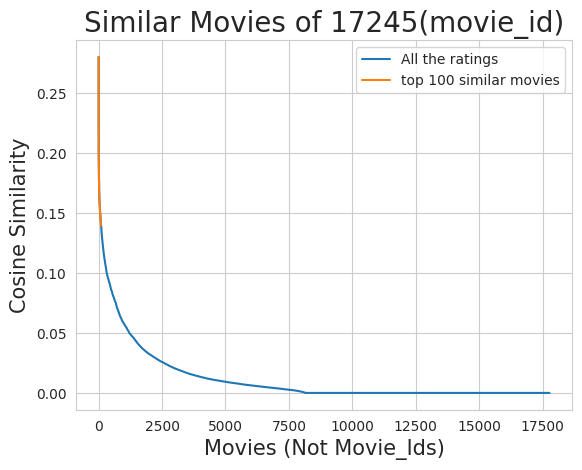

In [42]:
plt.plot(similarities[sim_indices], label='All the ratings')
plt.plot(similarities[sim_indices[:100]], label='top 100 similar movies')
plt.title("Similar Movies of {}(movie_id)".format(mv_id), fontsize=20)
plt.xlabel("Movies (Not Movie_Ids)", fontsize=15)
plt.ylabel("Cosine Similarity",fontsize=15)
plt.legend()
plt.show()

In [43]:
movie_titles.loc[sim_indices[:10]]

,year_of_release,title
movie_id,,
9242,1999.0,All About My Mother
12102,2001.0,Hedwig and the Angry Inch
11590,1995.0,The Celluloid Closet
9241,2000.0,Before Night Falls
15733,1996.0,Welcome to the Dollhouse
17431,1998.0,Run Lola Run
13810,2000.0,I'm the One That I Want
12500,1999.0,Boys Don't Cry
13412,2000.0,Billy Elliot


In [44]:
# ------------ML MODEL STARTS-------------------------

In [45]:
def get_sample_sparse_matrix(sparse_matrix, no_users, no_movies, path, verbose = True):
    row_ind, col_ind, ratings = sparse.find(sparse_matrix)
    users = np.unique(row_ind)
    movies = np.unique(col_ind)

    print("Original Matrix : (users, movies) -- ({} {})".format(len(users), len(movies)))
    print("Original Matrix : Ratings -- {}\n".format(len(ratings)))

    np.random.seed(15)
    sample_users = np.random.choice(users, no_users, replace=False)
    sample_movies = np.random.choice(movies, no_movies, replace=False)
    
    mask = np.logical_and( np.isin(row_ind, sample_users),np.isin(col_ind, sample_movies) )
    
    sample_sparse_matrix = sparse.csr_matrix((ratings[mask], (row_ind[mask], col_ind[mask])),shape=(max(sample_users)+1, max(sample_movies)+1))

    if verbose:
        print("Sampled Matrix : (users, movies) -- ({} {})".format(len(sample_users), len(sample_movies)))
        print("Sampled Matrix : Ratings --", format(ratings[mask].shape[0]))

    print('Saving it into disk for furthur usage..')
    sparse.save_npz(path, sample_sparse_matrix)
    if verbose:
            print('Done\n')
    
    return sample_sparse_matrix

In [46]:
start = datetime.now()
path = "/kaggle/input/saved-results-version-1/sample_train_sparse_matrix.npz"
if os.path.isfile(path):
    print("File found, getting it from disk....")
    sample_train_sparse_matrix = sparse.load_npz(path)
    print("DONE")
else: 
    # Get 10k users and 1k movies from available data 
    sample_train_sparse_matrix = get_sample_sparse_matrix(train_sparse_matrix, no_users=10000, no_movies=1000, path=path)

print(datetime.now() - start)

File found, getting it from disk....
DONE
0:00:00.026142


In [47]:
start = datetime.now()

path = "/kaggle/input/saved-results-version-1/sample_test_sparse_matrix.npz"
if os.path.isfile(path):
    print("File Found, getting it from disk....")
    sample_test_sparse_matrix = sparse.load_npz(path)
    print("DONE")
else:
    # get 5k users and 500 movies from available data 
    sample_test_sparse_matrix = get_sample_sparse_matrix(test_sparse_matrix, no_users=5000, no_movies=500, path = "sample_test_sparse_matrix.npz")
print(datetime.now() - start)

File Found, getting it from disk....
DONE
0:00:00.020059


In [48]:
sample_train_averages = dict()

In [49]:
# get the global average of ratings in our train set.
global_average = sample_train_sparse_matrix.sum()/sample_train_sparse_matrix.count_nonzero()
sample_train_averages['global'] = global_average
sample_train_averages

{'global': 3.5068467698482007}

In [50]:
sample_train_averages['user'] = get_average_ratings(sample_train_sparse_matrix, of_users=True)
# print(sample_train_averages['user'])
print('\nAverage rating of user 5762:', sample_train_averages['user'].get(5762, "User not found"))



Average rating of user 5762: 3.933333333333333


In [51]:
sample_train_averages['movie'] =  get_average_ratings(sample_train_sparse_matrix, of_users=False)
# print(sample_train_averages['movie'])
print('\n AVerage rating of movie 9233 :',sample_train_averages['movie'].get(9233,"Movie not found"))


 AVerage rating of movie 9233 : 3.0


In [52]:
print('\n No of ratings in Our Sampled train matrix is : {}\n'.format(sample_train_sparse_matrix.count_nonzero()))
print('\n No of ratings in Our Sampled test  matrix is : {}\n'.format(sample_test_sparse_matrix.count_nonzero()))


 No of ratings in Our Sampled train matrix is : 107642


 No of ratings in Our Sampled test  matrix is : 9249



In [53]:
# get users, movies and ratings from our samples train sparse matrix
sample_train_users, sample_train_movies, sample_train_ratings = sparse.find(sample_train_sparse_matrix)

In [54]:
start = datetime.now()
if os.path.isfile('/kaggle/input/saved-results-version-1/reg_train.csv'):
    print("File already exists you don't have to prepare again..." )
else:
    print('preparing {} tuples for the dataset..\n'.format(len(sample_train_ratings)))
    with open('reg_train.csv', mode='w') as reg_data_file:
        count = 0
        for (user, movie, rating)  in zip(sample_train_users, sample_train_movies, sample_train_ratings):
            st = datetime.now()
        #     print(user, movie)    
            #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            # compute the similar Users of the "user"        
            user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
            top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar users for this movie
            top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
            # we will make it's length "5" by adding movie averages to .
            top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
        #     print(top_sim_users_ratings, end=" ")    


            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            # compute the similar movies of the "movie"        
            movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
            top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
            # get the ratings of most similar movie rated by this user..
            top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
            # we will make it's length "5" by adding user averages to.
            top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
            top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
        #     print(top_sim_movies_ratings, end=" : -- ")

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            row.append(user)
            row.append(movie)
            # Now add the other features to this data...
            row.append(sample_train_averages['global']) # first feature
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            # Avg_user rating
            row.append(sample_train_averages['user'][user])
            # Avg_movie rating
            row.append(sample_train_averages['movie'][movie])

            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%10000 == 0:
                # print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))


print(datetime.now() - start)

File already exists you don't have to prepare again...
0:00:00.002020


In [55]:
reg_train = pd.read_csv('/kaggle/input/saved-results-version-1/reg_train.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5','smr1', 'smr2', 'smr3', 'smr4', 'smr5', 'UAvg', 'MAvg', 'rating'], header=None)
reg_train.head()

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,7,9229,3.506847,4.0,4.0,3.0,4.0,3.0,4.0,2.0,5.0,3.0,4.0,3.846154,3.497354,3
1,7,9471,3.506847,2.0,3.0,4.0,5.0,3.0,4.0,3.0,5.0,2.0,2.0,3.846154,3.730362,3
2,7,9481,3.506847,4.0,5.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,4.0,3.846154,3.647135,5
3,7,9613,3.506847,4.0,3.0,3.0,5.0,3.0,4.0,3.0,4.0,4.0,3.0,3.846154,3.082627,4
4,7,9685,3.506847,4.0,3.0,3.0,5.0,2.0,4.0,2.0,4.0,5.0,3.0,3.846154,3.228119,4


In [56]:
# get users, movies and ratings from the Sampled Test 
sample_test_users, sample_test_movies, sample_test_ratings = sparse.find(sample_test_sparse_matrix)

In [57]:
sample_train_averages['global']

3.5068467698482007

In [58]:
start = datetime.now()

if os.path.isfile('/kaggle/input/savedresult2/reg_test.csv'):
    print("It is already created...")
else:

    print('preparing {} tuples for the dataset..\n'.format(len(sample_test_ratings)))
    with open('reg_test.csv', mode='w') as reg_data_file:
        count = 0 
        for (user, movie, rating)  in zip(sample_test_users, sample_test_movies, sample_test_ratings):
            st = datetime.now()

        #--------------------- Ratings of "movie" by similar users of "user" ---------------------
            #print(user, movie)
            try:
                # compute the similar Users of the "user"        
                user_sim = cosine_similarity(sample_train_sparse_matrix[user], sample_train_sparse_matrix).ravel()
                top_sim_users = user_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar users for this movie
                top_ratings = sample_train_sparse_matrix[top_sim_users, movie].toarray().ravel()
                # we will make it's length "5" by adding movie averages to .
                top_sim_users_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_users_ratings.extend([sample_train_averages['movie'][movie]]*(5 - len(top_sim_users_ratings)))
                # print(top_sim_users_ratings, end="--")

            except (IndexError, KeyError):
                # It is a new User or new Movie or there are no ratings for given user for top similar movies...
                ########## Cold STart Problem ##########
                top_sim_users_ratings.extend([sample_train_averages['global']]*(5 - len(top_sim_users_ratings)))
                #print(top_sim_users_ratings)
            except:
                print(user, movie)
                # we just want KeyErrors to be resolved. Not every Exception...
                raise



            #--------------------- Ratings by "user"  to similar movies of "movie" ---------------------
            try:
                # compute the similar movies of the "movie"        
                movie_sim = cosine_similarity(sample_train_sparse_matrix[:,movie].T, sample_train_sparse_matrix.T).ravel()
                top_sim_movies = movie_sim.argsort()[::-1][1:] # we are ignoring 'The User' from its similar users.
                # get the ratings of most similar movie rated by this user..
                top_ratings = sample_train_sparse_matrix[user, top_sim_movies].toarray().ravel()
                # we will make it's length "5" by adding user averages to.
                top_sim_movies_ratings = list(top_ratings[top_ratings != 0][:5])
                top_sim_movies_ratings.extend([sample_train_averages['user'][user]]*(5-len(top_sim_movies_ratings))) 
                #print(top_sim_movies_ratings)
            except (IndexError, KeyError):
                #print(top_sim_movies_ratings, end=" : -- ")
                top_sim_movies_ratings.extend([sample_train_averages['global']]*(5-len(top_sim_movies_ratings)))
                #print(top_sim_movies_ratings)
            except :
                raise

            #-----------------prepare the row to be stores in a file-----------------#
            row = list()
            # add usser and movie name first
            row.append(user)
            row.append(movie)
            row.append(sample_train_averages['global']) # first feature
            #print(row)
            # next 5 features are similar_users "movie" ratings
            row.extend(top_sim_users_ratings)
            #print(row)
            # next 5 features are "user" ratings for similar_movies
            row.extend(top_sim_movies_ratings)
            #print(row)
            # Avg_user rating
            try:
                row.append(sample_train_averages['user'][user])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # Avg_movie rating
            try:
                row.append(sample_train_averages['movie'][movie])
            except KeyError:
                row.append(sample_train_averages['global'])
            except:
                raise
            #print(row)
            # finalley, The actual Rating of this user-movie pair...
            row.append(rating)
            #print(row)
            count = count + 1

            # add rows to the file opened..
            reg_data_file.write(','.join(map(str, row)))
            #print(','.join(map(str, row)))
            reg_data_file.write('\n')        
            if (count)%1000 == 0:
                #print(','.join(map(str, row)))
                print("Done for {} rows----- {}".format(count, datetime.now() - start))
    print("",datetime.now() - start) 

It is already created...


In [59]:
reg_test_df = pd.read_csv('/kaggle/input/savedresult2/reg_test.csv', names = ['user', 'movie', 'GAvg', 'sur1', 'sur2', 'sur3', 'sur4', 'sur5',
                                                          'smr1', 'smr2', 'smr3', 'smr4', 'smr5',
                                                          'UAvg', 'MAvg', 'rating'], header=None)
reg_test_df.head(4)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating
0,756,9552,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,2
1,756,11427,3.506847,3.000000,1.000000,5.000000,4.000000,4.000000,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.773913,4
2,756,17033,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,4
3,1485,10491,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,1


In [60]:
from surprise import Reader, Dataset

In [61]:
# It is to specify how to read the dataframe.
# for our dataframe, we don't have to specify anything extra..
reader = Reader(rating_scale=(1,5))

# create the traindata from the dataframe...
train_data = Dataset.load_from_df(reg_train[['user', 'movie', 'rating']], reader)

# build the trainset from traindata.., It is of dataset format from surprise library..
trainset = train_data.build_full_trainset() 

In [62]:
testset = list(zip(reg_test_df.user.values, reg_test_df.movie.values, reg_test_df.rating.values))
testset[:3]

[(756, 9552, 2), (756, 11427, 4), (756, 17033, 4)]

In [63]:
models_evaluation_train = dict()
models_evaluation_test = dict()

models_evaluation_train, models_evaluation_test

({}, {})

In [64]:
# to get rmse and mape given actual and predicted ratings..
def get_error_metrics(y_true, y_pred):
    rmse = np.sqrt(np.mean([ (y_true[i] - y_pred[i])**2 for i in range(len(y_pred)) ]))
    mape = np.mean(np.abs( (y_true - y_pred)/y_true )) * 100
    return rmse, mape

###################################################################
###################################################################
def run_xgboost(algo,  x_train, y_train, x_test, y_test, verbose=True):
    """
    It will return train_results and test_results
    """
    
    # dictionaries for storing train and test results
    train_results = dict()
    test_results = dict()
    
    
    # fit the model
    print('Training the model..')
    start =datetime.now()
    algo.fit(x_train, y_train, eval_metric = 'rmse')
    print('Done. Time taken : {}\n'.format(datetime.now()-start))
    print('Done \n')

    # from the trained model, get the predictions....
    print('Evaluating the model with TRAIN data...')
    start =datetime.now()
    y_train_pred = algo.predict(x_train)
    # get the rmse and mape of train data...
    rmse_train, mape_train = get_error_metrics(y_train.values, y_train_pred)
    
    # store the results in train_results dictionary..
    train_results = {'rmse': rmse_train,
                    'mape' : mape_train,
                    'predictions' : y_train_pred}
    
    #######################################
    # get the test data predictions and compute rmse and mape
    print('Evaluating Test data')
    y_test_pred = algo.predict(x_test) 
    rmse_test, mape_test = get_error_metrics(y_true=y_test.values, y_pred=y_test_pred)
    # store them in our test results dictionary.
    test_results = {'rmse': rmse_test,
                    'mape' : mape_test,
                    'predictions':y_test_pred}
    if verbose:
        print('\nTEST DATA')
        print('-'*30)
        print('RMSE : ', rmse_test)
        print('MAPE : ', mape_test)
        
    # return these train and test results...
    return train_results, test_results
    

In [65]:
# it is just to makesure that all of our algorithms should produce same results
# everytime they run...

my_seed = 15
random.seed(my_seed)
np.random.seed(my_seed)

##########################################################
# get  (actual_list , predicted_list) ratings given list 
# of predictions (prediction is a class in Surprise).    
##########################################################
def get_ratings(predictions):
    actual = np.array([pred.r_ui for pred in predictions])
    pred = np.array([pred.est for pred in predictions])
    
    return actual, pred

################################################################
# get ''rmse'' and ''mape'' , given list of prediction objecs 
################################################################
def get_errors(predictions, print_them=False):

    actual, pred = get_ratings(predictions)
    rmse = np.sqrt(np.mean((pred - actual)**2))
    mape = np.mean(np.abs(pred - actual)/actual)

    return rmse, mape*100

##################################################################################
# It will return predicted ratings, rmse and mape of both train and test data   #
##################################################################################
def run_surprise(algo, trainset, testset, verbose=True): 
    '''
        return train_dict, test_dict
    
        It returns two dictionaries, one for train and the other is for test
        Each of them have 3 key-value pairs, which specify ''rmse'', ''mape'', and ''predicted ratings''.
    '''
    start = datetime.now()
    # dictionaries that stores metrics for train and test..
    train = dict()
    test = dict()
    
    # train the algorithm with the trainset
    st = datetime.now()
    print('Training the model...')
    algo.fit(trainset)
    print('Done. time taken : {} \n'.format(datetime.now()-st))
    
    # ---------------- Evaluating train data--------------------#
    st = datetime.now()
    print('Evaluating the model with train data..')
    # get the train predictions (list of prediction class inside Surprise)
    train_preds = algo.test(trainset.build_testset())
    # get predicted ratings from the train predictions..
    train_actual_ratings, train_pred_ratings = get_ratings(train_preds)
    # get ''rmse'' and ''mape'' from the train predictions.
    train_rmse, train_mape = get_errors(train_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Train Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(train_rmse, train_mape))
    
    #store them in the train dictionary
    if verbose:
        print('adding train results in the dictionary..')
    train['rmse'] = train_rmse
    train['mape'] = train_mape
    train['predictions'] = train_pred_ratings
    
    #------------ Evaluating Test data---------------#
    st = datetime.now()
    print('\nEvaluating for test data...')
    # get the predictions( list of prediction classes) of test data
    test_preds = algo.test(testset)
    # get the predicted ratings from the list of predictions
    test_actual_ratings, test_pred_ratings = get_ratings(test_preds)
    # get error metrics from the predicted and actual ratings
    test_rmse, test_mape = get_errors(test_preds)
    print('time taken : {}'.format(datetime.now()-st))
    
    if verbose:
        print('-'*15)
        print('Test Data')
        print('-'*15)
        print("RMSE : {}\n\nMAPE : {}\n".format(test_rmse, test_mape))
    # store them in test dictionary
    if verbose:
        print('storing the test results in test dictionary...')
    test['rmse'] = test_rmse
    test['mape'] = test_mape
    test['predictions'] = test_pred_ratings
    
    print('\n'+'-'*45)
    print('Total time taken to run this algorithm :', datetime.now() - start)
    
    # return two dictionaries train and test
    return train, test

In [66]:
import xgboost as xgb

Training the model..
Done. Time taken : 0:00:00.672417

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.1745147754185474
MAPE :  38.63897397324223


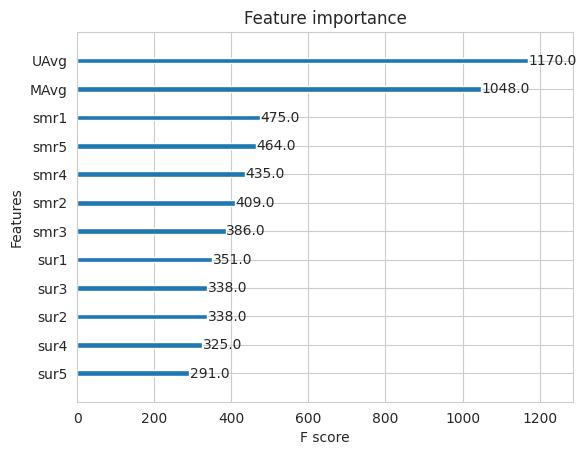

In [67]:
# prepare Train data
x_train = reg_train.drop(['user','movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# initialize Our first XGBoost model...
first_xgb = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
train_results, test_results = run_xgboost(first_xgb, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['first_algo'] = train_results
models_evaluation_test['first_algo'] = test_results

xgb.plot_importance(first_xgb)
plt.show()

In [68]:
from surprise import BaselineOnly 

In [69]:
# options are to specify.., how to compute those user and item biases
bsl_options = {'method': 'sgd',
               'learning_rate': .001
               }
bsl_algo = BaselineOnly(bsl_options=bsl_options)
# run this algorithm.., It will return the train and test results..
bsl_train_results, bsl_test_results = run_surprise(bsl_algo, trainset, testset, verbose=True)


# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['bsl_algo'] = bsl_train_results 
models_evaluation_test['bsl_algo'] = bsl_test_results

Training the model...
Estimating biases using sgd...
Done. time taken : 0:00:00.435898 

Evaluating the model with train data..
time taken : 0:00:00.810871
---------------
Train Data
---------------
RMSE : 0.9540313296695998

MAPE : 30.67055543142137

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.194290
---------------
Test Data
---------------
RMSE : 1.0813834661183348

MAPE : 33.661671184328746

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:01.441418


In [70]:
# add our baseline_predicted value as our feature..
reg_train['bslpr'] = models_evaluation_train['bsl_algo']['predictions']
reg_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,7,9229,3.506847,4.0,4.0,3.0,4.0,3.0,4.0,2.0,5.0,3.0,4.0,3.846154,3.497354,3,3.717723
1,7,9471,3.506847,2.0,3.0,4.0,5.0,3.0,4.0,3.0,5.0,2.0,2.0,3.846154,3.730362,3,3.898261


In [71]:
# add that baseline predicted ratings with Surprise to the test data as well
reg_test_df['bslpr']  = models_evaluation_test['bsl_algo']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr
0,756,9552,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,2,3.506847
1,756,11427,3.506847,3.000000,1.000000,5.000000,4.000000,4.000000,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.773913,4,3.843061


Training the model..
Done. Time taken : 0:00:00.562870

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0863057979069375
MAPE :  35.15453734988457


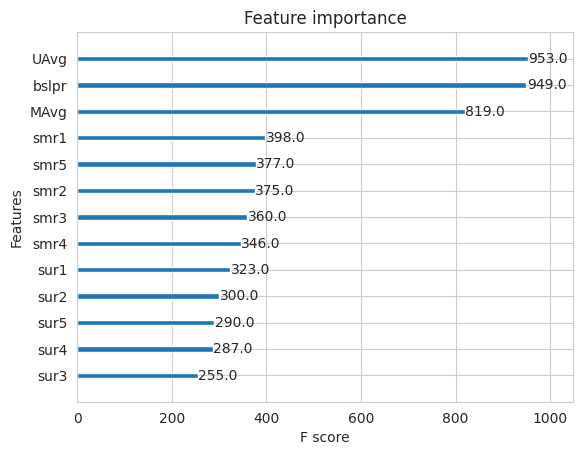

In [72]:
# prepare train data
x_train = reg_train.drop(['user', 'movie','rating'], axis=1)
y_train = reg_train['rating']

# Prepare Test data
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# initialize Our first XGBoost model...
xgb_bsl = xgb.XGBRegressor(silent=False, n_jobs=13, random_state=15, n_estimators=100)
train_results, test_results = run_xgboost(xgb_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_bsl'] = train_results
models_evaluation_test['xgb_bsl'] = test_results

xgb.plot_importance(xgb_bsl)
plt.show()

In [73]:
from surprise import KNNBaseline

In [74]:

# we specify , how to compute similarities and what to consider with sim_options to our algorithm
sim_options = {'user_based' : True,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'} 

knn_bsl_u = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)
knn_bsl_u_train_results, knn_bsl_u_test_results = run_surprise(knn_bsl_u, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_u'] = knn_bsl_u_train_results 
models_evaluation_test['knn_bsl_u'] = knn_bsl_u_test_results

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:10.704446 

Evaluating the model with train data..
time taken : 0:02:04.370244
---------------
Train Data
---------------
RMSE : 0.3052155379184955

MAPE : 8.438296719582052

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.110484
---------------
Test Data
---------------
RMSE : 1.0820434919980766

MAPE : 33.62405338738885

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:02:15.185511


In [75]:
# we specify , how to compute similarities and what to consider with sim_options to our algorithm

# 'user_based' : Fals => this considers the similarities of movies instead of users

sim_options = {'user_based' : False,
               'name': 'pearson_baseline',
               'shrinkage': 100,
               'min_support': 2
              } 
# we keep other parameters like regularization parameter and learning_rate as default values.
bsl_options = {'method': 'sgd'}


knn_bsl_m = KNNBaseline(k=40, sim_options = sim_options, bsl_options = bsl_options)

knn_bsl_m_train_results, knn_bsl_m_test_results = run_surprise(knn_bsl_m, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['knn_bsl_m'] = knn_bsl_m_train_results 
models_evaluation_test['knn_bsl_m'] = knn_bsl_m_test_results

Training the model...
Estimating biases using sgd...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Done. time taken : 0:00:00.531375 

Evaluating the model with train data..
time taken : 0:00:08.440454
---------------
Train Data
---------------
RMSE : 0.29267760543603455

MAPE : 7.653490036199203

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.082610
---------------
Test Data
---------------
RMSE : 1.0822239214973646

MAPE : 33.62521948328281

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:09.054793


In [76]:
# add the predicted values from both knns to this dataframe
reg_train['knn_bsl_u'] = models_evaluation_train['knn_bsl_u']['predictions']
reg_train['knn_bsl_m'] = models_evaluation_train['knn_bsl_m']['predictions']

reg_train.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,7,9229,3.506847,4.0,4.0,3.0,4.0,3.0,4.0,2.0,5.0,3.0,4.0,3.846154,3.497354,3,3.717723,3.392601,3.434940
1,7,9471,3.506847,2.0,3.0,4.0,5.0,3.0,4.0,3.0,5.0,2.0,2.0,3.846154,3.730362,3,3.898261,3.385700,3.347491


In [77]:
reg_test_df['knn_bsl_u'] = models_evaluation_test['knn_bsl_u']['predictions']
reg_test_df['knn_bsl_m'] = models_evaluation_test['knn_bsl_m']['predictions']

reg_test_df.head(2)

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,smr3,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m
0,756,9552,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,2,3.506847,3.506847,3.506847
1,756,11427,3.506847,3.000000,1.000000,5.000000,4.000000,4.000000,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.773913,4,3.843061,3.947352,3.947352


Training the model..
Done. Time taken : 0:00:00.753526

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0941529947228599
MAPE :  34.11748312003128


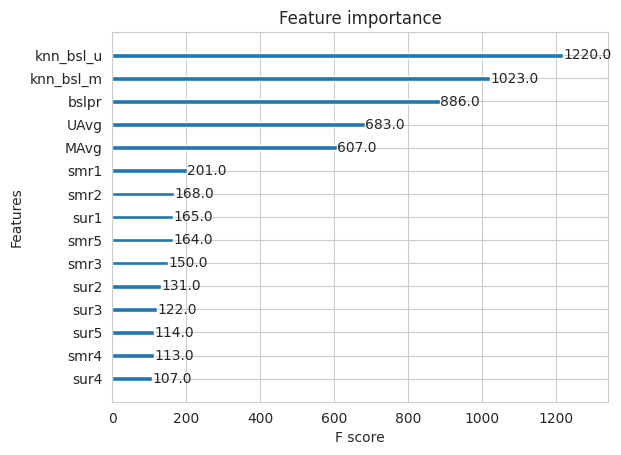

In [78]:
# prepare the train data....
x_train = reg_train.drop(['user', 'movie', 'rating'], axis=1)
y_train = reg_train['rating']

# prepare the train data....
x_test = reg_test_df.drop(['user','movie','rating'], axis=1)
y_test = reg_test_df['rating']

# declare the model
xgb_knn_bsl = xgb.XGBRegressor(n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_knn_bsl, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_knn_bsl'] = train_results
models_evaluation_test['xgb_knn_bsl'] = test_results


xgb.plot_importance(xgb_knn_bsl)
plt.show()

In [79]:
from surprise import SVD

In [80]:
# initiallize the model
svd = SVD(n_factors=100, biased=True, random_state=15, verbose=True)
svd_train_results, svd_test_results = run_surprise(svd, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svd'] = svd_train_results 
models_evaluation_test['svd'] = svd_test_results

Training the model...
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Done. time taken : 0:00:01.255701 

Evaluating the model with train data..
time taken : 0:00:01.216267
---------------
Train Data
---------------
RMSE : 0.6589686540711817

MAPE : 20.35242724204985

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.076991
---------------
Test Data
---------------
RMSE : 1.0809529337955952

MAPE : 33.602288372491884

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:02.549299


In [81]:
from surprise import SVDpp

In [82]:
# initiallize the model
svdpp = SVDpp(n_factors=50, random_state=15, verbose=True)
svdpp_train_results, svdpp_test_results = run_surprise(svdpp, trainset, testset, verbose=True)

# Just store these error metrics in our models_evaluation datastructure
models_evaluation_train['svdpp'] = svdpp_train_results 
models_evaluation_test['svdpp'] = svdpp_test_results

Training the model...
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
Done. time taken : 0:00:27.357174 

Evaluating the model with train data..
time taken : 0:00:06.473581
---------------
Train Data
---------------
RMSE : 0.6016377712341373

MAPE : 18.05879323853391

adding train results in the dictionary..

Evaluating for test data...
time taken : 0:00:00.083655
---------------
Test Data
---------------
RMSE : 1.0819318642765392

MAPE : 33.588017592680835

storing the test results in test dictionary...

---------------------------------------------
Total time taken to run this algorithm : 0:00:33.914780


In [83]:
# add the predicted values from both knns to this dataframe
reg_train['svd'] = models_evaluation_train['svd']['predictions']
reg_train['svdpp'] = models_evaluation_train['svdpp']['predictions']

reg_train.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,7,9229,3.506847,4.0,4.0,3.0,4.0,3.0,4.0,2.0,...,3.0,4.0,3.846154,3.497354,3,3.717723,3.392601,3.434940,3.745441,3.800659
1,7,9471,3.506847,2.0,3.0,4.0,5.0,3.0,4.0,3.0,...,2.0,2.0,3.846154,3.730362,3,3.898261,3.385700,3.347491,3.706969,3.490726


In [84]:
reg_test_df['svd'] = models_evaluation_test['svd']['predictions']
reg_test_df['svdpp'] = models_evaluation_test['svdpp']['predictions']

reg_test_df.head(2) 

,user,movie,GAvg,sur1,sur2,sur3,sur4,sur5,smr1,smr2,...,smr4,smr5,UAvg,MAvg,rating,bslpr,knn_bsl_u,knn_bsl_m,svd,svdpp
0,756,9552,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,3.506847,...,3.506847,3.506847,3.506847,3.506847,2,3.506847,3.506847,3.506847,3.506847,3.506847
1,756,11427,3.506847,3.000000,1.000000,5.000000,4.000000,4.000000,3.506847,3.506847,...,3.506847,3.506847,3.506847,3.773913,4,3.843061,3.947352,3.947352,3.849121,3.612502


Training the model..
Done. Time taken : 0:00:00.702324

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.0950683060223516
MAPE :  33.929022394068866


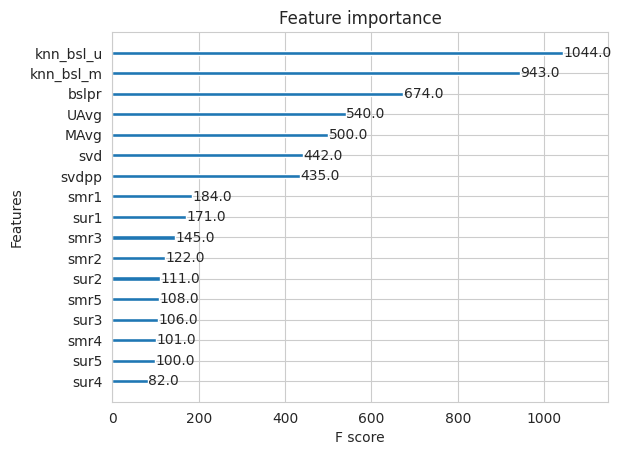

In [85]:
# prepare x_train and y_train
x_train = reg_train.drop(['user', 'movie', 'rating',], axis=1)
y_train = reg_train['rating']

# prepare test data
x_test = reg_test_df.drop(['user', 'movie', 'rating'], axis=1)
y_test = reg_test_df['rating']



xgb_final = xgb.XGBRegressor(n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_final, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_final'] = train_results
models_evaluation_test['xgb_final'] = test_results


xgb.plot_importance(xgb_final)
plt.show()

Training the model..
Done. Time taken : 0:00:00.311387

Done 

Evaluating the model with TRAIN data...
Evaluating Test data

TEST DATA
------------------------------
RMSE :  1.1034080150894496
MAPE :  33.3094747076723


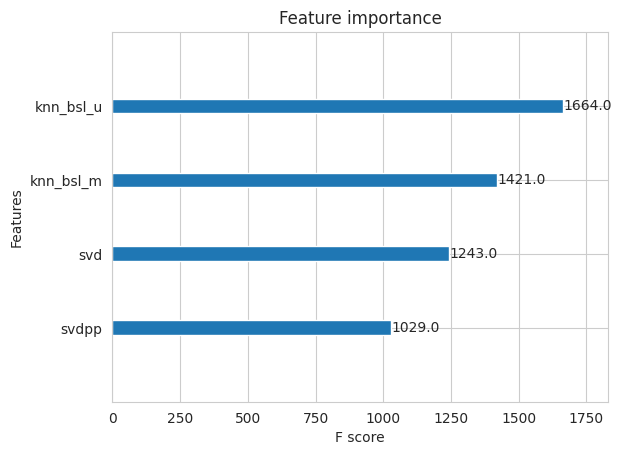

In [86]:
# prepare train data
x_train = reg_train[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_train = reg_train['rating']

# test data
x_test = reg_test_df[['knn_bsl_u', 'knn_bsl_m', 'svd', 'svdpp']]
y_test = reg_test_df['rating']


xgb_all_models = xgb.XGBRegressor(n_jobs=10, random_state=15)
train_results, test_results = run_xgboost(xgb_all_models, x_train, y_train, x_test, y_test)

# store the results in models_evaluations dictionaries
models_evaluation_train['xgb_all_models'] = train_results
models_evaluation_test['xgb_all_models'] = test_results

xgb.plot_importance(xgb_all_models)
plt.show()

In [87]:
# Saving our TEST_RESULTS into a dataframe so that you don't have to run it again
pd.DataFrame(models_evaluation_test).to_csv('small_sample_results.csv')
models = pd.read_csv('small_sample_results.csv', index_col=0)
models.loc['rmse'].sort_values()

svd               1.0809529337955952
bsl_algo          1.0813834661183348
svdpp             1.0819318642765392
knn_bsl_u         1.0820434919980766
knn_bsl_m         1.0822239214973646
xgb_bsl           1.0863057979069375
xgb_knn_bsl       1.0941529947228599
xgb_final         1.0950683060223516
xgb_all_models    1.1034080150894496
first_algo        1.1745147754185474
Name: rmse, dtype: object

In [88]:
print("-"*100)
print("Total time taken to run this entire notebook ( with saved files) is :",datetime.now()-globalstart)

----------------------------------------------------------------------------------------------------
Total time taken to run this entire notebook ( with saved files) is : 0:08:35.287278
